In [209]:
# common libararies imported
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('Display.max_columns',None)

# For model building
from lightgbm import LGBMClassifier

# For evaluation
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score,precision_score

# Data reading and basic eyeballing

In [2]:
train=pd.read_csv('train_qWM28Yl.csv')
test=pd.read_csv('test_zo1G9sv.csv')

In [3]:
df=pd.concat([train,test],axis=0,ignore_index=True)

In [4]:
# first five rows of the data
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [5]:
# shape of the data
df.shape

(97655, 44)

In [6]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

In [7]:
# checking for missing values
df.isnull().sum()

policy_id                               0
policy_tenure                           0
age_of_car                              0
age_of_policyholder                     0
area_cluster                            0
population_density                      0
make                                    0
segment                                 0
model                                   0
fuel_type                               0
max_torque                              0
max_power                               0
engine_type                             0
airbags                                 0
is_esc                                  0
is_adjustable_steering                  0
is_tpms                                 0
is_parking_sensors                      0
is_parking_camera                       0
rear_brakes_type                        0
displacement                            0
cylinder                                0
transmission_type                       0
gear_box                          

In [8]:
# corelation matrix
df.corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
policy_tenure,1.000000,0.166699,0.144657,-0.100810,0.084603,0.100620,0.195993,0.195794,0.091451,0.164727,0.190996,0.214654,0.119637,0.139324,0.174242,0.078747
age_of_car,0.166699,1.000000,-0.034864,-0.064552,0.188268,0.210026,0.392543,0.377622,0.201691,0.334199,0.383258,0.415098,0.258764,0.301226,0.350050,-0.028172
age_of_policyholder,0.144657,-0.034864,1.000000,0.009923,-0.033607,-0.009657,-0.024449,0.004698,-0.004020,-0.017938,-0.020850,-0.007535,-0.053823,-0.008847,-0.033277,0.022435
population_density,-0.100810,-0.064552,0.009923,1.000000,-0.038604,-0.058581,-0.091529,-0.092126,-0.055270,-0.078097,-0.092010,-0.099679,-0.059264,-0.074389,-0.074098,-0.017808
make,0.084603,0.188268,-0.033607,-0.038604,1.000000,0.502935,0.754028,0.413033,0.633616,0.754639,0.693186,0.512800,0.305773,0.482971,0.792153,-0.000456
airbags,0.100620,0.210026,-0.009657,-0.058581,0.502935,1.000000,0.662968,0.481806,0.860177,0.810707,0.809765,0.640518,0.428377,0.830621,0.342299,0.002789
displacement,0.195993,0.392543,-0.024449,-0.091529,0.754028,0.662968,1.000000,0.866697,0.693492,0.876345,0.962026,0.901099,0.556147,0.777200,0.847685,0.007678
cylinder,0.195794,0.377622,0.004698,-0.092126,0.413033,0.481806,0.866697,1.000000,0.413059,0.617954,0.806623,0.865000,0.350658,0.604387,0.599516,0.013434
gear_box,0.091451,0.201691,-0.004020,-0.055270,0.633616,0.860177,0.693492,0.413059,1.000000,0.861795,0.809508,0.603298,0.582587,0.895334,0.530223,-0.000635
turning_radius,0.164727,0.334199,-0.017938,-0.078097,0.754639,0.810707,0.876345,0.617954,0.861795,1.000000,0.945062,0.825208,0.465713,0.824172,0.779249,0.002724


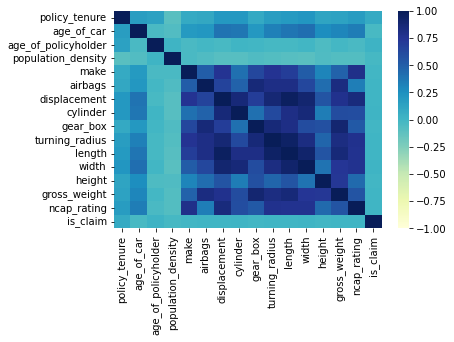

In [9]:
# corelation visualization
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='YlGnBu')
plt.show()

# Data Cleaning, feature extraction and engineering

In [10]:
# Dropping the redundant policy id column
df.drop(columns='policy_id',inplace=True)

In [11]:
# Spearating the max torque column
df[['max_torque_nm','max_torque_rpm']]=df.max_torque.str.split('@',expand=True)

In [12]:
# Sepearating max power column
df[['max_power_bhp','max_power_rpm']]=df.max_power.str.split('@',expand=True)

In [13]:
# Creating a function to take only numeric part of a string
def take_number(x):
    s=''
    for i in x:
        if i.isnumeric() or i=='.':
            s=s+i
    return float(s)

In [14]:
# Taking only numeric parts from max power and max torque
df.max_power_bhp=df.max_power_bhp.apply(take_number)
df.max_power_rpm=df.max_power_rpm.apply(take_number)
df.max_torque_nm=df.max_torque_nm.apply(take_number)
df.max_torque_rpm=df.max_torque_rpm.apply(take_number)

In [15]:
# Dropping max_power and max_torque columns
df.drop(columns=['max_power','max_torque'],inplace=True)

In [16]:
# Creating feature-cubic meter size
df['cubic_meter_size']=df.length*df.width*df.height

In [17]:
# Dropping columns length, width and height
df.drop(columns=['length','width','height'],inplace=True)

In [18]:
sorted(df.is_brake_assist.unique())

['No', 'Yes']

In [19]:
# Mapping all binary columns
cats=df.select_dtypes('object')
for i in cats:
    if sorted(df[i].unique())==['No', 'Yes']:
        df[i]=df[i].map({'No':0,'Yes':1})

In [20]:
# creating new feature- bore area*stroke
df['bore_area_mult_stroke']=df.displacement/df.cylinder

In [21]:
df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rpm,cubic_meter_size,bore_area_mult_stroke
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,7698283125,265.333333
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,7698283125,265.333333
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,7698283125,265.333333
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.80,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0,10500957375,299.250000
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.00,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0,8777961010,333.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97650,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.80,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,NaN,113.0,4400.0,88.50,6000.0,10206744750,299.250000
97651,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,1.5 L U2 CRDi,6,1,1,1,1,1,Disc,1493,4,Automatic,6,Power,5.20,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,NaN,250.0,2750.0,113.45,4000.0,12584595000,373.250000
97652,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,1.2 L K Series Engine,6,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.85,1410,1,1,1,1,1,1,1,1,1,1,1,1,0,NaN,113.0,4400.0,88.50,6000.0,10443825000,299.250000
97653,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.80,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,NaN,113.0,4400.0,88.50,6000.0,10500957375,299.250000


# Encoding and splitting of the data

In [22]:
dummy=pd.get_dummies(df,drop_first=True)

In [23]:
# Splitting the data into train and test sets
train.shape,test.shape

((58592, 44), (39063, 43))

In [24]:
newtrain=dummy.iloc[:train.shape[0],:]
newtest=dummy.iloc[train.shape[0]:,:]

In [25]:
newtrain.shape,newtest.shape

((58592, 88), (39063, 88))

In [26]:
x_train=newtrain.drop(columns='is_claim')
x_test=newtest.drop(columns='is_claim')
y_train=newtrain.is_claim

In [210]:
df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rpm,cubic_meter_size,bore_area_mult_stroke
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,7698283125,265.333333
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,7698283125,265.333333
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.60,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,7698283125,265.333333
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.80,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0,10500957375,299.250000
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.00,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0,8777961010,333.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97650,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,K Series Dual jet,2,0,1,0,1,0,Drum,1197,4,Manual,5,Electric,4.80,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,NaN,113.0,4400.0,88.50,6000.0,10206744750,299.250000
97651,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,1.5 L U2 CRDi,6,1,1,1,1,1,Disc,1493,4,Automatic,6,Power,5.20,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,NaN,250.0,2750.0,113.45,4000.0,12584595000,373.250000
97652,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,1.2 L K Series Engine,6,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.85,1410,1,1,1,1,1,1,1,1,1,1,1,1,0,NaN,113.0,4400.0,88.50,6000.0,10443825000,299.250000
97653,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.80,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,NaN,113.0,4400.0,88.50,6000.0,10500957375,299.250000


# Modelling

In [27]:
# Before proceeding to our modelling we will create a function to check th evaluation scores

def evaluation(y_test,y_pred):
    
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
    
# Our evaluation fucntion is now created

In [204]:
# after a lot of hit and trial this was the best parameter list we found
lgbm=LGBMClassifier(boosting_type='dart',learning_rate=0.1,n_estimators=50,scale_pos_weight=10)
model=lgbm.fit(x_train,y_train)
y_pred=model.predict(x_test).astype('int')

In [205]:
sub=pd.DataFrame({'policy_id':test.policy_id,'is_claim':y_pred})
sub.to_csv('Submission.csv',index=False)

In [206]:
sub.is_claim.value_counts()

0    32044
1     7019
Name: is_claim, dtype: int64

Accuracy Score: 0.8074993173129438
f1_score: 0.20821340821340822
Precision: 0.14127846051252738
Recall: 0.39567769477054426
Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.84      0.89     54844
         1.0       0.14      0.40      0.21      3748

    accuracy                           0.81     58592
   macro avg       0.55      0.62      0.55     58592
weighted avg       0.90      0.81      0.85     58592



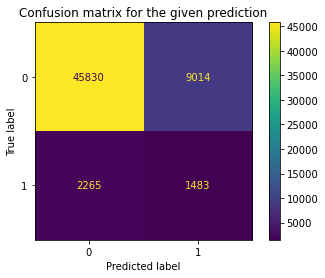

In [207]:
evaluation(y_train,model.predict(x_train))

## Conclusion
* At the end of our model bulding we got a public leaderboard f1-score of 0.1717277487, ranking 18th in the public leaderboard
* Feature engineering played a crucial part in increasing the f1-score by a few points.
* After observing we found that models had a high tendency of becoming overfitted on the training data.
* The final model used was Lightgbm with custom weight 10 to the positive class.
* From a business point of view we were not able to make a very good model in terms ofn f1-score. Choosing recall as the evaluation metric would result in a much better model, with more true positive being able to predict though at the cost of precision and accuracy.